In [ ]:
import plotly.express as px
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

X, y = make_classification(n_samples=500, random_state=0)

model = LogisticRegression()
model.fit(X, y)
y_score = model.predict_proba(X)[:, 1]
fpr, tpr, thresholds = roc_curve(y, y_score)
roc_auc= auc(fpr, tpr)

In [ ]:
import numpy as np
def find_threshold(tpr,fpr,thresholds,tpr_rate):
  index = np.where(tpr > tpr_rate)[0][0]
  # print(f'On TPR={tpr[index]:.2f} and FPR={fpr[index]:.2f} the threshold is {thresholds[index]:.2f}')
  return index
find_threshold(tpr,fpr,thresholds,0.9)

66

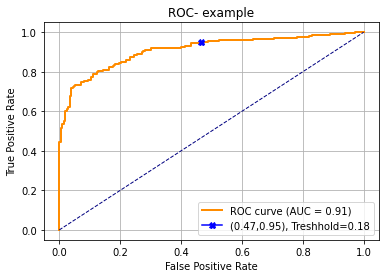

In [ ]:
def plot_roc(fpr,tpr,roc_auc,title,find_thresholdswith_tpr=[]):
  fig, ax = plt.subplots()
  lw = 2 # line_width
  ax.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (AUC = %0.2f)' % roc_auc)
  ax.plot([0, 1], [0, 1], color='navy', lw=lw-1, linestyle='--')
  ax.set_xlim([-0.05, 1.05])
  ax.set_xlabel('False Positive Rate')
  ax.set_ylabel('True Positive Rate')
  ax.set_title(f'ROC- {title}')
  ax.grid(True)
  if len(find_thresholdswith_tpr) > 0:
    colors= {0:'b',1:'r',2:'g',3:'black',4:'cyan'}
    for i,t in enumerate(find_thresholdswith_tpr):
      index = find_threshold(tpr,fpr,thresholds,t)
      # set text
      text = f'({fpr[index]:.2f},{tpr[index]:.2f}), Treshhold={thresholds[index]:.2f}'
      ax.plot(fpr[index],tpr[index],color=colors[i],marker='X',label=text)
  ax.legend(loc="lower right")
  ax.plot()
plot_roc(fpr,tpr,roc_auc,"example",[0.95])

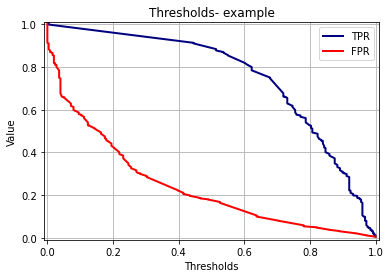

In [ ]:
def plot_thresholds(fpr,tpr,thresholds,title):
  fig, ax = plt.subplots()
  lw = 2 # line_width
  ax.plot(tpr, thresholds, color='navy',lw=lw, label='TPR')
  ax.plot(fpr, thresholds, color='red',lw=lw, label='FPR')
  ax.set_xlim([-0.01, 1.01])
  ax.set_ylim([-0.01, 1.01])
  ax.set_xlabel('Thresholds')
  ax.set_ylabel('Value')
  ax.set_title(f'Thresholds- {title}')
  ax.legend(loc="upper right")
  ax.grid(True)
  ax.plot()

plot_thresholds(fpr,tpr,thresholds,"example")